# The Communication Value of Axisymmetric Channels

In this notebook, we plot the communication value of axisymmetric channels.
These channels are constructed from the axisymmetric states described in https://arxiv.org/pdf/1505.01833.pdf.
For the family of axisymmetric states it is known that all PPT states are also separable.
This is convenient as it allows us to use `pptCVPrimal` and `pptCVDual` functions to compute the communication value. 

In [9]:
using CVChannel
using Plots

In [10]:
"""
This function scans over the parameter space for axisymmetric channels
and computes the communication value for each axisymmetric channel.
Two parameters, x and y, are scanned with their respective number of
samples across the domain of the axisymmetric states.

The returned data is arranged to be plotted as a contour plot.
"""
function scan_axisymmetric_cv(d, x_samples, y_samples)
    x_bound = CVChannel._axisymmetric_x_bounds(d)
    y_bound = CVChannel._axisymmetric_y_bounds(d)

    x_step = (x_bound[2]-x_bound[1])/x_samples
    y_step = (y_bound[2]-y_bound[1])/y_samples

    x_range = x_bound[1]:x_step:x_bound[2]
    y_range = y_bound[1]:y_step:y_bound[2]

    cvs = zeros(Float64, length(y_range), length(x_range))

    for y_id in 1:length(y_range)

        y = y_range[y_id]

        x_constraints = CVChannel._axisymmetric_x_constraints(d,y)

        xid_lower = findfirst(x_id -> x_range[x_id] ≥ x_constraints[1], 1:length(x_range))
        xid_upper = findlast(x_id -> x_range[x_id] ≤ x_constraints[2], 1:length(x_range))

        for x_id in xid_lower:xid_upper

            x = x_range[x_id]

            ρ_axi = axisymmetricState(d,x,y)

            J_N = d * ρ_axi
            (opt_cv_N, opt_σAB_N) = pptCVDual(J_N, d, d)

            cvs[y_id,x_id] = opt_cv_N 
        end
    end
    
    return (x_range, y_range, cvs)
end;

## Plotting Communication Value for Axisymmetric Qudit Channels

### d=2

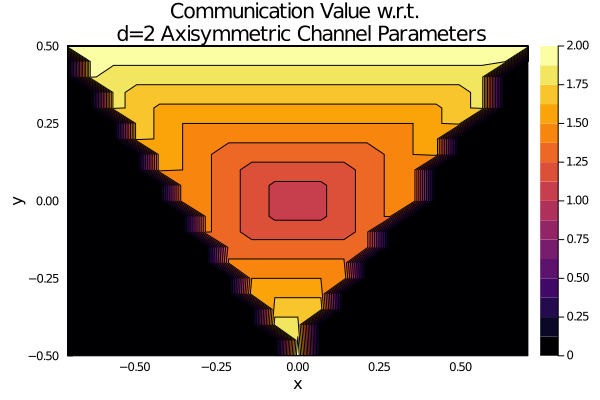

In [11]:
x_range, y_range, cvs = scan_axisymmetric_cv(2,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Communication Value w.r.t. \n d=2 Axisymmetric Channel Parameters",
)

### d=3

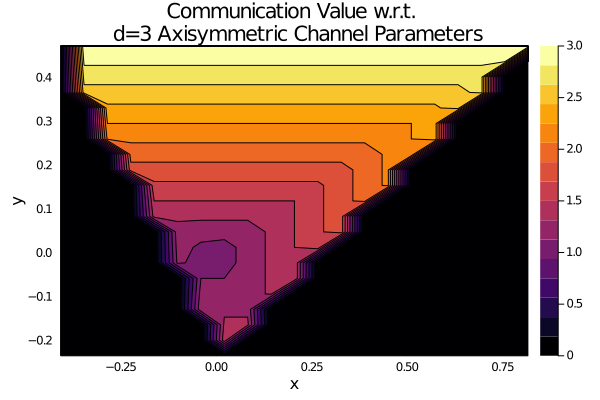

In [12]:
x_range, y_range, cvs = scan_axisymmetric_cv(3,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Communication Value w.r.t. \n d=3 Axisymmetric Channel Parameters",
)

### d=4

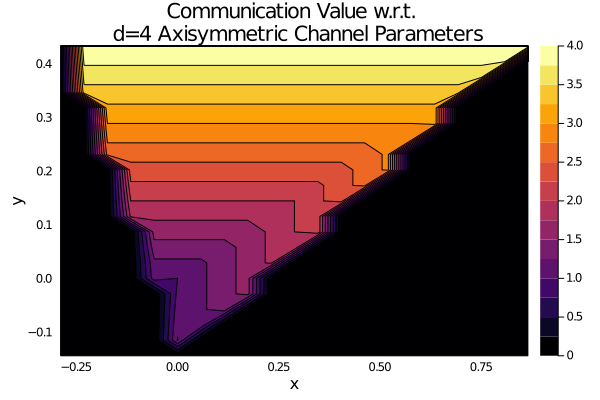

In [13]:
x_range, y_range, cvs = scan_axisymmetric_cv(4,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Communication Value w.r.t. \n d=4 Axisymmetric Channel Parameters",
)

### d=5

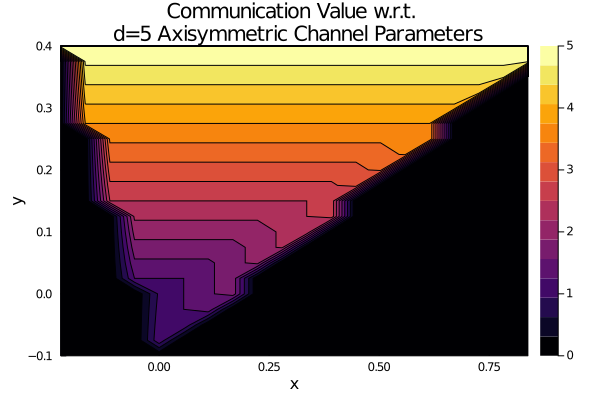

In [14]:
x_range, y_range, cvs = scan_axisymmetric_cv(5,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Communication Value w.r.t. \n d=5 Axisymmetric Channel Parameters",
)

### d=6

 54.867288 seconds (17.54 M allocations: 4.365 GiB, 1.38% gc time)


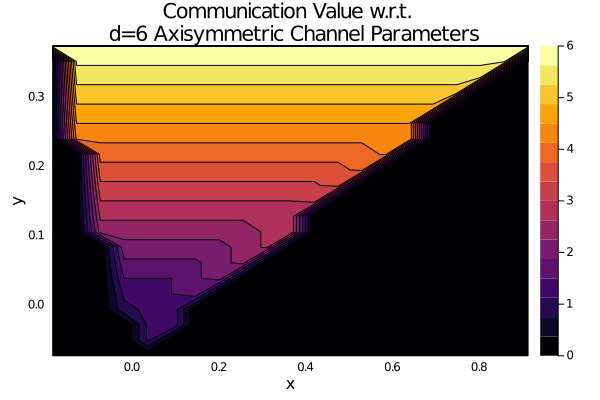

In [15]:
@time x_range, y_range, cvs = scan_axisymmetric_cv(6,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Communication Value w.r.t. \n d=6 Axisymmetric Channel Parameters",
)

### d=7

105.789814 seconds (32.00 M allocations: 8.502 GiB, 1.23% gc time)


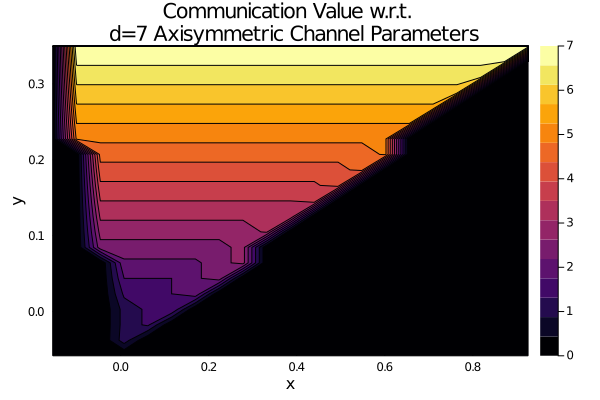

In [16]:
@time x_range, y_range, cvs = scan_axisymmetric_cv(7,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Communication Value w.r.t. \n d=7 Axisymmetric Channel Parameters",
)